# Data Preprocessing & Understanding

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv("Dataset.csv")


/tmp/ipykernel_273949/805625135.py:1: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Dataset.csv")


In [ ]:
data.shape

In [14]:
data.dtypes

NameError: name 'data' is not defined

In [5]:
print(data.isnull().sum())

NACCID      0
NACCADC     0
PACKET      0
FORMVER     0
VISITMO     0
           ..
NPATGFRN    0
NPATGFR1    0
NPATGFR2    0
NPATGFR3    0
NPATGFR4    0
Length: 1024, dtype: int64


# Feature Engineering & Selection

In [ ]:
non_medical_columns = [
                       'NACCADC'
                       ,'PACKET'
                       ,'FORMVER'
                       ,'VISITMO'
                       ,'VISITDAY'
                       ,'VISITYR'
                       ,'NACCVNUM'
                       ,'NACCAVST'
                       ,'NACCNVST'
                       ,'NACCDAYS'
                       ,'NACCFDYS'
                       ,'NACCREAS'
                       ,'NACCREFR'
                       ,'BIRTHMO'
                       ,'BIRTHYR'
                       ,'SEX'
                       ,'HISPANIC'
                       ,'HISPOR'
                       ,'RACE'
                       ,'PRIMLANG'
                       ,'EDUC'
                       ,'MARISTAT'
                       ,'NACCLIVS'
                       ,'INDEPEND'
                       ,'RESIDENC'
                       ,'HANDED'
                       ,'INBIRMO'
                       ,'INBIRYR'
                       ,'INSEX'
                       ,'NEWINF'
                       ,'INHISP'
                       ,'INHISPOR'
                       ,'NACCNINR'
                       ,'INRACE'
                       ,'INEDUC'
                       ,'INRELTO'
                       ,'INKNOWN'
                       ,'INLIVWTH'
                       ,'INVISITS'
                       ,'INCALLS'
                       ,'INRELY'
                       ,'BILLS'
                       ,'TAXES'
                       ,'SHOPPING'
                       ,'GAMES'
                       ,'STOVE'
                       ,'MEALPREP'
                       ,'EVENTS'
                       ,'PAYATTN'
                       ,'REMDATES'
                       ,'TRAVEL'
                       ,'NACCAGEB'
                       ,'NACCNIHR'
                       ,'HEIGHT'
                       ,'WEIGHT'
                       ,'NACCBMI'
                       ,'NACCAGE'
                       ,'NACCDIED'
                       ,'NACCAUTP'
                       ,'NACCACTV'
                       ,'NACCNOVS'
                       ,'NACCNURP'
                       ,'NACCFTD'
                       ,'NACCMDSS'
                       ,'NACCPAFF'
                       ,'NACCLBDM'
                       ,'NACCACSF'
                       ,'NACCPCSF'
                       ,'NACCTCSF'
                       ,'NACCMRSA'
                       ,'NACCNMRI','NACCAPSA','NACCNAPA','TELCOV','TELMOD','NOGDS','SATIS','DROPACT','EMPTY','BORED','SPIRITS','AFRAID','HAPPY','HELPLESS','STAYHOME','MEMPROB','WONDRFUL','WRTHLESS','ENERGY','HOPELESS','BETTER','NACCGDS',
                       ]

In [5]:
lev1=data[non_medical_columns + ['DEMENTED']]

NameError: name 'data' is not defined

In [ ]:
lev1.shape

In [1]:
lev1.to_csv('cleaned_data.csv')

NameError: name 'lev1' is not defined

In [ ]:
for col in lev1.columns:
    print(col,len(lev1[col].unique()),'labels')



In [2]:
lev1 = pd.read_csv('cleaned_data.csv')

In [7]:
packt_dec = {"I":1,"F":2,"IT":3,"T":4}

lev1['PACKET']=[packt_dec[g] for g in lev1['PACKET'] ]

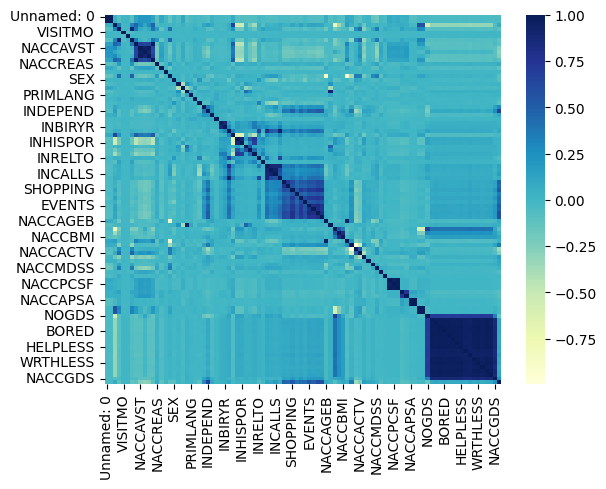

In [6]:
import seaborn as su
import matplotlib.pyplot as plt

su.heatmap(lev1.corr(),cmap="YlGnBu")
plt.show()

In [3]:
#Same Info Twice
#Neuropathology data from an autopsy is available
columns_to_drop = [
    'NACCFDYS', 'NACCAGEB', 'HEIGHT', 'WEIGHT', 'SATIS', 'DROPACT', 'EMPTY',
    'BORED', 'SPIRITS', 'AFRAID', 'HAPPY', 'HELPLESS', 'STAYHOME',
    'MEMPROB', 'WONDRFUL', 'WRTHLESS', 'ENERGY', 'HOPELESS', 'BETTER',
    'NACCADC', 'NACCAVST', 'NACCNVST', 'NACCDIED', 'NACCAUTP', 'NACCACTV',
    'NACCNOVS', 'NACCNURP', 'NACCFTD', 'NACCMDSS', 'NACCPAFF',
    'NACCLBDM', 'NACCACSF', 'NACCPCSF', 'NACCTCSF', 'NACCMRSA',
    'NACCNMRI', 'NACCAPSA', 'NACCNAPA'
]


# Feature Lists
numerical_features = [
    'NACCVNUM', 'NACCDAYS', 'EDUC', 'INBIRMO', 'INBIRYR', 'INEDUC', 'INKNOWN',
    'BILLS', 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS',
    'PAYATTN', 'REMDATES', 'TRAVEL', 'NACCAGE', 'NACCBMI', 'NACCGDS'
]


categorical_features = [
    'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCREAS',
    'NACCREFR', 'BIRTHMO', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'PRIMLANG',
    'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'INSEX',
    'NEWINF', 'INHISP', 'INHISPOR', 'NACCNINR', 'INRACE', 'INRELTO',
    'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY', 'NACCNIHR', 'TELCOV',
    'TELMOD', 'NOGDS'
]



# Model Development & Training

# Hyperparameter Tuning & Optimization & Model Evaluation & Metrics

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Drop rows where 'DEMENTED' is NaN
lev1_cleaned = lev1.dropna(subset=['DEMENTED'])

y = lev1_cleaned['DEMENTED']
X = lev1_cleaned.drop(['DEMENTED'] + columns_to_drop, axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


**Full Model Pipeline (Using LightGBM)**

In [8]:

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [5, 10]
}

grid_search = GridSearchCV(
    lgbm_pipeline,
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)



In [9]:
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)


print("\n--- Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search.best_params_)


best_model = grid_search.best_estimator_
final_accuracyLightGBM = best_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best Model: {final_accuracyLightGBM:.4f}")

Starting Grid Search...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 46080, number of negative: 110076
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 156156, number of used features: 252
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.295090 -> initscore=-0.870792
[LightGBM] [Info] Start training from score -0.870792

--- Grid Search Complete ---
Best Score (Accuracy): 0.9373
Best Parameters Found:
{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy on Test Set with Best Model: 0.9377


**Full Model Pipeline (Using Random Forest)**

In [10]:

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])


param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid_rf,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for Random Forest...")
grid_search_rf.fit(X_train, y_train)


print("\n--- Random Forest Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_rf.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_rf.best_params_)


best_rf_model = grid_search_rf.best_estimator_
final_rf_accuracyRandomForest = best_rf_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best Random Forest: {final_rf_accuracyRandomForest:.4f}")

Starting Grid Search for Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



--- Random Forest Grid Search Complete ---
Best Score (Accuracy): 0.9331
Best Parameters Found:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}
Accuracy on Test Set with Best Random Forest: 0.9338


**Full Model Pipeline (Using LogisticRegression)**

In [11]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'))
])


param_grid_lr = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.01, 0.1, 1.0, 10.0]
}


grid_search_lr = GridSearchCV(
    lr_pipeline,
    param_grid_lr,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for Logistic Regression...")
grid_search_lr.fit(X_train, y_train)


print("\n--- Logistic Regression Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_lr.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_lr.best_params_)


best_lr_model = grid_search_lr.best_estimator_
final_lr_accuracy = best_lr_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best Logistic Regression: {final_lr_accuracy:.4f}")

Starting Grid Search for Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- Logistic Regression Grid Search Complete ---
Best Score (Accuracy): 0.9091
Best Parameters Found:
{'model__C': 10.0, 'model__penalty': 'l1'}
Accuracy on Test Set with Best Logistic Regression: 0.9078


**Full Model Pipeline (Using CatBoostClassifier)**

In [13]:
from catboost import CatBoostClassifier


cb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', CatBoostClassifier(random_state=42, verbose=0))
])

param_grid_cb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [5, 10]
}

grid_search_cb = GridSearchCV(
    cb_pipeline,
    param_grid_cb,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for CatBoost...")
grid_search_cb.fit(X_train, y_train)

print("\n--- CatBoost Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_cb.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_cb.best_params_)

best_cb_model = grid_search_cb.best_estimator_
final_cb_accuracy = best_cb_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best CatBoost: {final_cb_accuracy:.4f}")

Starting Grid Search for CatBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



--- CatBoost Grid Search Complete ---
Best Score (Accuracy): 0.9374
Best Parameters Found:
{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200}
Accuracy on Test Set with Best CatBoost: 0.9379


**Full Model Pipeline (Using XGBClassifier)**

In [14]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(random_state=42, eval_metric='logloss'))
])

param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [5, 10]
}

grid_search_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid_xgb,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for XGBoost...")
grid_search_xgb.fit(X_train, y_train)

print("\n--- XGBoost Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_xgb.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_xgb.best_params_)

best_xgb_model = grid_search_xgb.best_estimator_
final_xgb_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best XGBoost: {final_xgb_accuracy:.4f}")

Starting Grid Search for XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- XGBoost Grid Search Complete ---
Best Score (Accuracy): 0.9396
Best Parameters Found:
{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200}
Accuracy on Test Set with Best XGBoost: 0.9409


**Neural Network (MLPClassifier) Pipeline**

In [15]:
from sklearn.neural_network import MLPClassifier

mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(random_state=42, max_iter=1000, early_stopping=True))
])


param_grid_mlp = {
    'model__hidden_layer_sizes': [(100,), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001]
}

grid_search_mlp = GridSearchCV(
    mlp_pipeline,
    param_grid_mlp,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for MLPClassifier (Neural Network)...")
grid_search_mlp.fit(X_train, y_train)

print("\n--- MLPClassifier Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_mlp.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_mlp.best_params_)

best_mlp_model = grid_search_mlp.best_estimator_
final_mlp_accuracy = best_mlp_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best MLPClassifier: {final_mlp_accuracy:.4f}")

Starting Grid Search for MLPClassifier (Neural Network)...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

--- MLPClassifier Grid Search Complete ---
Best Score (Accuracy): 0.9090
Best Parameters Found:
{'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,)}
Accuracy on Test Set with Best MLPClassifier: 0.9087


**StackingClassifier Pipeline (Meta-Model)**

In [16]:
from sklearn.ensemble import StackingClassifier

estimator_list = [
    ('lgbm', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LGBMClassifier(random_state=42, learning_rate=0.1, max_depth=10, n_estimators=200))
    ])),
    ('rf', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42, max_depth=None, min_samples_leaf=1, n_estimators=200))
    ])),
    ('lr', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', C=1.0, penalty='l1'))
    ]))
]

stacking_model = StackingClassifier(
    estimators=estimator_list,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=3,
    n_jobs=-1
)


param_grid_stacking = {
    'final_estimator__C': [0.1, 1.0, 10.0]
}

grid_search_stacking = GridSearchCV(
    stacking_model,
    param_grid_stacking,
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search for StackingClassifier...")
grid_search_stacking.fit(X_train, y_train)

print("\n--- StackingClassifier Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_stacking.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_stacking.best_params_)

best_stacking_model = grid_search_stacking.best_estimator_
final_stacking_accuracy = best_stacking_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best StackingClassifier: {final_stacking_accuracy:.4f}")

Starting Grid Search for StackingClassifier...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



--- StackingClassifier Grid Search Complete ---
Best Score (Accuracy): 0.9373
Best Parameters Found:
{'final_estimator__C': 0.1}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy on Test Set with Best StackingClassifier: 0.9374


In [17]:
print(f"Accuracy on Test Set with Best LightGBM : {final_accuracyLightGBM:.4f}")
print(f"Accuracy on Test Set with Best Logistic Regression: {final_lr_accuracy:.4f}")
print(f"Accuracy on Test Set with Best CatBoost: {final_cb_accuracy:.4f}")
print(f"Accuracy on Test Set with Best XGBoost: {final_xgb_accuracy:.4f}")
print(f"Accuracy on Test Set with Best MLPClassifier: {final_mlp_accuracy:.4f}")

Accuracy on Test Set with Best LightGBM : 0.9377
Accuracy on Test Set with Best Logistic Regression: 0.9078
Accuracy on Test Set with Best CatBoost: 0.9379
Accuracy on Test Set with Best XGBoost: 0.9409
Accuracy on Test Set with Best MLPClassifier: 0.9087


/tmp/ipython-input-1730259465.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  splot = su.barplot(


Model accuracy comparison plot saved as 'model_accuracy_comparison.png'


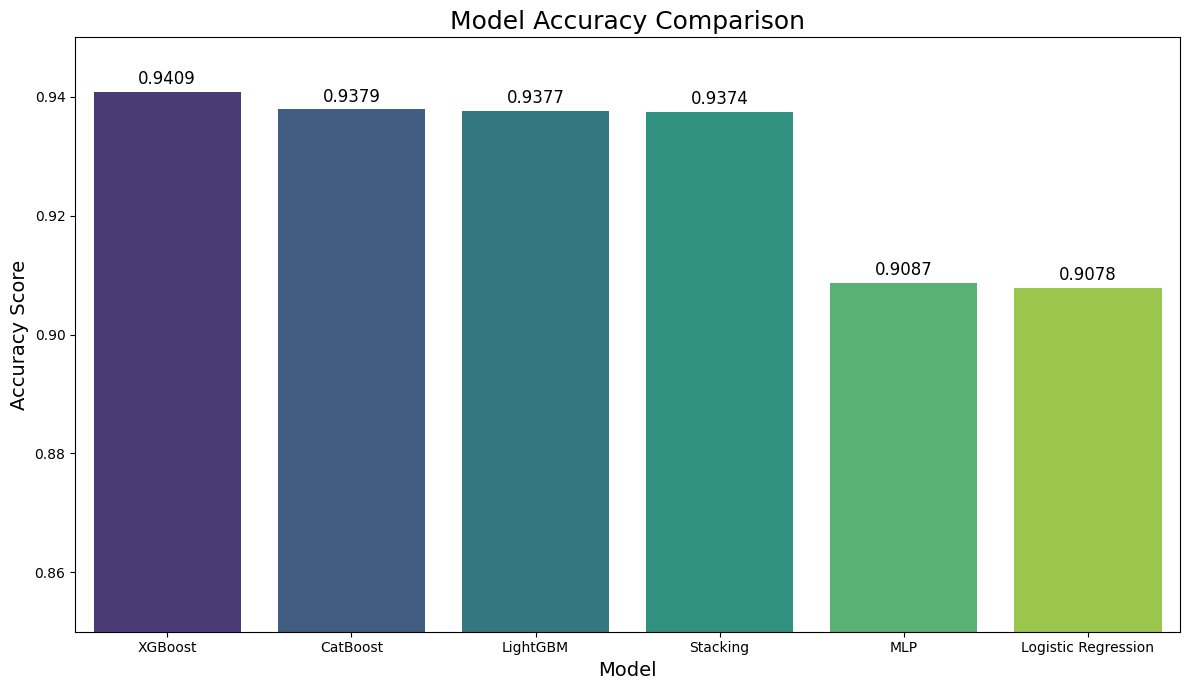

In [18]:
import pandas as pd
import seaborn as su
import matplotlib.pyplot as plt

model_scores = {
    'LightGBM': final_accuracyLightGBM,
    'Logistic Regression': final_lr_accuracy,
    'CatBoost': final_cb_accuracy,
    'XGBoost': final_xgb_accuracy,
    'MLP': final_mlp_accuracy,
    'Stacking': final_stacking_accuracy
}

scores_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy'])
scores_df = scores_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(12, 7))

splot = su.barplot(
    x='Model',
    y='Accuracy',
    data=scores_df,
    palette='viridis'
)

plt.title('Model Accuracy Comparison', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)

plt.ylim(0.85, 0.95)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center',
                   va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=12)

plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')

print("Model accuracy comparison plot saved as 'model_accuracy_comparison.png'")

**According to that grahp best model is XGBoost**

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier


y = lev1['DEMENTED']
X = lev1.drop(['DEMENTED'] + columns_to_drop, axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


In [6]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(random_state=42, eval_metric='logloss'))
])

param_grid_xgb = {
    'model__n_estimators': [1, 50000],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [5, 10]
}

grid_search_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid_xgb,
    cv=3,
    n_jobs=-1,
    verbose=3
)

print("Starting Grid Search for XGBoost...")
grid_search_xgb.fit(X_train, y_train)

print("\n--- XGBoost Grid Search Complete ---")
print(f"Best Score (Accuracy): {grid_search_xgb.best_score_:.4f}")
print("Best Parameters Found:")
print(grid_search_xgb.best_params_)

best_xgb_model = grid_search_xgb.best_estimator_
final_xgb_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Accuracy on Test Set with Best XGBoost: {final_xgb_accuracy:.4f}")

Starting Grid Search for XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 2/3] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=1;, score=0.705 total time=   7.8s
[CV 1/3] END model__learning_rate=0.01, model__max_depth=10, model__n_estimators=1;, score=0.705 total time=   7.7s
[CV 1/3] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=1;, score=0.705 total time=   8.3s
[CV 3/3] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=1;, score=0.705 total time=   7.9s
[CV 2/3] END model__learning_rate=0.01, model__max_depth=10, model__n_estimators=1;, score=0.705 total time=   8.4s
[CV 3/3] END model__learning_rate=0.01, model__max_depth=10, model__n_estimators=1;, score=0.705 total time=   8.4s
[CV 1/3] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=1;, score=0.705 total time=   4.3s
[CV 2/3] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=1;, score=0.705 to

# Explainability & Insights

/tmp/ipython-input-1065543945.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  su.barplot(


Feature importance plot saved as 'xgb_feature_importance.png'

Top 20 Features:
                   Feature  Importance
153        cat__INDEPEND_1    0.483107
9            num__SHOPPING    0.035254
15           num__REMDATES    0.027870
7               num__BILLS    0.026593
8               num__TAXES    0.014712
16             num__TRAVEL    0.013011
13             num__EVENTS    0.008234
156        cat__INDEPEND_4    0.006405
248           cat__NOGDS_0    0.006121
14            num__PAYATTN    0.004886
249           cat__NOGDS_1    0.004103
10              num__GAMES    0.003619
157        cat__INDEPEND_9    0.003583
155        cat__INDEPEND_3    0.003423
96         cat__NACCREFR_2    0.003196
119          cat__HISPOR_4    0.003035
185       cat__INHISPOR_88    0.002979
237        cat__NACCNIHR_5    0.002706
250  remainder__Unnamed: 0    0.002702
180        cat__INHISPOR_3    0.002678


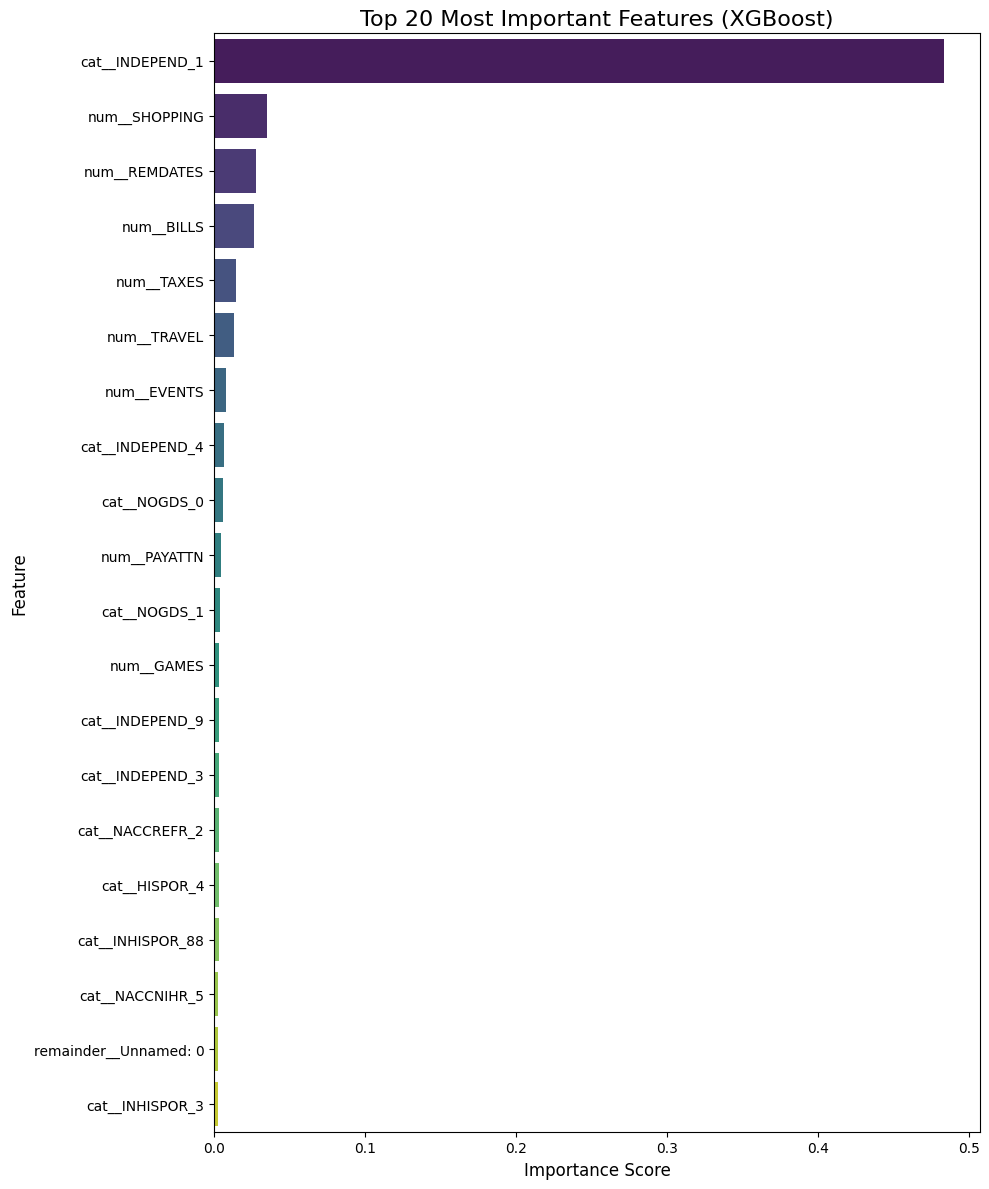

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as su


best_xgb_pipeline = grid_search_xgb.best_estimator_


xgb_model = best_xgb_pipeline.named_steps['model']


preprocessor = best_xgb_pipeline.named_steps['preprocessor']

# Get all feature names after preprocessing, including those passed through by 'remainder'
all_feature_names = preprocessor.get_feature_names_out()

importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 12)) # Wider figure to read labels
su.barplot(
    x='Importance',
    y='Feature',
    data=top_20_features,
    palette='viridis'
)

plt.title('Top 20 Most Important Features (XGBoost)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

plt.savefig('xgb_feature_importance.png')

print("Feature importance plot saved as 'xgb_feature_importance.png'")
print("\nTop 20 Features:")
print(top_20_features)